# Introduction

Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them.

The recommender system deals with a large volume of information present by filtering the most important information based on the data provided by a user and other factors that take care of the user’s preference and interest. It finds out the match between user and item and imputes the similarities between users and items for recommendation.

Both the users and the services provided have benefited from these kinds of systems. The quality and decision-making process has also improved through these kinds of systems.

There are many different things that can be recommended by the system like movies, books, news, articles, jobs, advertisements, etc. Netflix uses a recommender system to recommend movies & web-series to its users. Similarly, YouTube recommends different videos. There are many examples of recommender systems that are widely used today.



# Goal

Create a recommender system to recommend articles similar to the article being read by customer.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Load and inspect your data.

In [5]:
import pandas as pd

data = pd.read_csv('../dataset/result_final.csv')

# Inspect first and last n rows from a dataframe
def display_df(df, nrows):
    return pd.concat([df.head(nrows), df.tail(nrows)])

print(data.shape)
print(data.dtypes)
display_df(data, 3)


(2190, 9)
Unnamed: 0.1      int64
Unnamed: 0        int64
link             object
text             object
title            object
date             object
keywords         object
summary          object
title_summary    object
dtype: object


,Unnamed: 0.1,Unnamed: 0,link,text,title,date,keywords,summary,title_summary
0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
2187,1287,1287,https://www.reuters.com/article/syria-crisis-f...,AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...,2020-09-16 23:25:09+00:00,"['shortages', 'imports', 'gasoline', 'shipment...",AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...
2188,1288,1288,https://af.reuters.com/article/uk-iran-usa-wor...,Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International...",NaN,"['international', 'tvs', 'sundays', 'united', ...",Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International..."
2189,1289,1289,https://in.reuters.com/article/global-metals-i...,"MELBOURNE, Sept 17 (Reuters) - London copper f...",METALS-LME copper falls most in seven sessions...,2020-09-17 04:45:08+00:00,"['copper', 'sessions', 'metalslme', 'seven', '...","MELBOURNE, Sept 17 (Reuters) - London copper f...",METALS-LME copper falls most in seven sessions...


## Data Cleaning

In [6]:
# Count how many missing values are in each column
data.isna().sum()

Unnamed: 0.1       0
Unnamed: 0         0
link               0
text               6
title              3
date             499
keywords           3
summary            6
title_summary      6
dtype: int64

<Axes: >

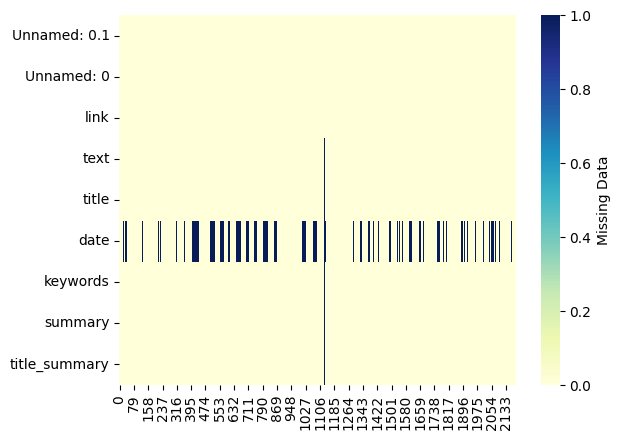

In [7]:
# Check is there's a pattern in missing data
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [8]:
# Check if we can fill na's by using last date
display_df(data['date'], 8)

0             2020-09-07 00:00:00
1             2020-09-16 00:00:00
2             2020-09-14 00:00:00
3             2020-09-09 00:00:00
4             2020-09-15 00:00:00
5             2020-09-15 00:00:00
6             2020-09-14 00:00:00
7             2020-09-15 00:00:00
2182    2020-09-14 10:39:14+00:00
2183                          NaN
2184                          NaN
2185    2020-09-16 18:18:18+00:00
2186    2020-09-16 23:07:30+00:00
2187    2020-09-16 23:25:09+00:00
2188                          NaN
2189    2020-09-17 04:45:08+00:00
Name: date, dtype: object

In [9]:
# Drop news with missing title_summary
data.dropna(how = 'any', subset = ['title_summary'], inplace = True)
print(data.isna().sum())

Unnamed: 0.1       0
Unnamed: 0         0
link               0
text               0
title              0
date             495
keywords           0
summary            0
title_summary      0
dtype: int64


In [10]:
# Check duplicated news
for column in data.columns:
    print(f' {column} has {data[data.duplicated(subset = column, keep = False)].shape[0]} duplicates')

 Unnamed: 0.1 has 1792 duplicates
 Unnamed: 0 has 1792 duplicates
 link has 443 duplicates
 text has 708 duplicates
 title has 782 duplicates
 date has 1423 duplicates
 keywords has 401 duplicates
 summary has 723 duplicates
 title_summary has 704 duplicates


In [11]:
# Check some duplicated news with the same title
display_df(data[data.duplicated(subset = 'title', keep = False)].sort_values('title'), 4)

,Unnamed: 0.1,Unnamed: 0,link,text,title,date,keywords,summary,title_summary
890,890,890,https://mashable.com/article/contagion-6-month...,All products featured here are independently s...,'Contagion' hits different 6 months into the p...,2020-09-11 18:44:25+00:00,"['pandemic', 'months', 'come', 'contagion', 'j...","In retrospect, I should have realized Contagio...",'Contagion' hits different 6 months into the p...
2051,1151,1151,https://mashable.com/article/contagion-6-month...,All products featured here are independently s...,'Contagion' hits different 6 months into the p...,2020-09-11 18:44:25+00:00,"['hits', 'jory', 'trying', 'days', 'months', '...","In retrospect, I should have realized Contagio...",'Contagion' hits different 6 months into the p...
777,777,777,https://mashable.com/article/princess-bride-re...,There are a whole lot of people who worship th...,'The Princess Bride' cast is reuniting to rais...,2020-09-05 19:04:41+00:00,"['elwes', 'sept', 'virtual', 'thrilled', 'rais...",There are a whole lot of people who worship th...,'The Princess Bride' cast is reuniting to rais...
1181,281,281,https://mashable.com/article/princess-bride-re...,There are a whole lot of people who worship th...,'The Princess Bride' cast is reuniting to rais...,2020-09-05 19:04:41+00:00,"['wisconsin', 'reuniting', 'raise', 'princess'...",There are a whole lot of people who worship th...,'The Princess Bride' cast is reuniting to rais...
1290,390,390,https://mashable.com/article/youtube-announces...,With TikTok’s future in the U.S. up in the air...,YouTube officially announces TikTok competitor...,2020-09-14 18:26:55+00:00,"['competitor', 'announces', 'shorts', 'officia...","On Monday, YouTube officially announced its ne...",YouTube officially announces TikTok competitor...
28,28,28,https://mashable.com/article/youtube-announces...,With TikTok’s future in the U.S. up in the air...,YouTube officially announces TikTok competitor...,2020-09-14 18:26:55+00:00,"['video', 'feature', 'youtube', 'shorts', 'off...","On Monday, YouTube officially announced its ne...",YouTube officially announces TikTok competitor...
358,358,358,https://af.reuters.com/article/commoditiesNews...,《程实专栏》中国“双循环”格局下的内需倍增\n\n“积土成山，风雨兴焉。”面向中国经济的高质...,路透中文网,NaN,"['路透中文网', '程实专栏中国双循环格局下的内需倍增积土成山风雨兴焉面向中国经济的高质量...",《程实专栏》中国“双循环”格局下的内需倍增“积土成山，风雨兴焉。”面向中国经济的高质量发展，...,路透中文网 《程实专栏》中国“双循环”格局下的内需倍增\n\n“积土成山，风雨兴焉。”面向中...
74,74,74,https://af.reuters.com/article/uk-health-coron...,《程实专栏》中国“双循环”格局下的内需倍增\n\n“积土成山，风雨兴焉。”面向中国经济的高质...,路透中文网,NaN,"['路透中文网', '程实专栏中国双循环格局下的内需倍增积土成山风雨兴焉面向中国经济的高质量...",《程实专栏》中国“双循环”格局下的内需倍增“积土成山，风雨兴焉。”面向中国经济的高质量发展，...,路透中文网 《程实专栏》中国“双循环”格局下的内需倍增\n\n“积土成山，风雨兴焉。”面向中...


In [12]:
# Remove all duplicated news with same title except for the first occurence
data.drop_duplicates(subset = 'title', keep = 'first', inplace = True)
print(data.shape)

(1720, 9)


In [13]:
# Check if there are still duplicated news
for column in data.columns:
    print(f' {column} has {data[data.duplicated(subset = column, keep = False)].shape[0]} duplicates')

 Unnamed: 0.1 has 1176 duplicates
 Unnamed: 0 has 1176 duplicates
 link has 0 duplicates
 text has 6 duplicates
 title has 0 duplicates
 date has 982 duplicates
 keywords has 2 duplicates
 summary has 12 duplicates
 title_summary has 0 duplicates


In [14]:
# Check duplicated news with same summary
data[data.duplicated(subset = 'summary', keep = False)].sort_values('summary')

,Unnamed: 0.1,Unnamed: 0,link,text,title,date,keywords,summary,title_summary
88,88,88,https://in.reuters.com/news/picture/top-photos...,"More than 12,000 people, mostly refugees from ...",Top Photos of the Day,2020-09-09 17:28:08+00:00,"['syria', 'shelter', 'moria', 'migrant', 'open...","More than 12,000 people, mostly refugees from ...","Top Photos of the Day More than 12,000 people,..."
337,337,337,https://in.reuters.com/news/picture/chadwick-b...,"More than 12,000 people, mostly refugees from ...",Chadwick Boseman: 1976 - 2020,2020-08-29 17:11:11+00:00,"['syria', 'shelter', 'moria', 'chadwick', 'ope...","More than 12,000 people, mostly refugees from ...","Chadwick Boseman: 1976 - 2020 More than 12,000..."
149,149,149,https://in.reuters.com/article/india-autos-roy...,NEW DELHI (Reuters) - India’s commerce ministe...,India urges auto companies to cut royalties to...,2020-08-18 10:25:47+00:00,"['parents', 'royalties', 'sources', 'auto', 'r...",NEW DELHI (Reuters) - India’s commerce ministe...,India urges auto companies to cut royalties to...
1397,497,497,https://www.reuters.com/article/us-india-autos...,NEW DELHI (Reuters) - India’s commerce ministe...,India urges auto companies to cut royalties to...,2020-08-18 10:06:34+00:00,"['cut', 'foreign', 'royalty', 'sources', 'paym...",NEW DELHI (Reuters) - India’s commerce ministe...,India urges auto companies to cut royalties to...
43,43,43,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Sep 10,2020-09-10 04:57:36+00:00,"['rptindia', 'mth', '1300', '425', '1100', 'se...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Sep 10 Cas...
45,45,45,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Sep 16,2020-09-16 04:48:36+00:00,"['rptindia', '1005', 'mth', '432', '433', '431...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Sep 16 Cas...
138,138,138,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Aug 25,2020-08-25 04:50:48+00:00,"['rptindia', 'premiaaug', '1005', '24', 'mth',...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Aug 25 Cas...
235,235,235,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Sep 3,2020-09-03 04:43:36+00:00,"['rptindia', '1005', 'mth', '419', '1300', 'se...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Sep 3 Cash...
317,317,317,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Aug 26,2020-08-26 04:52:22+00:00,"['rptindia', 'premiaaug', '1005', 'mth', '1300...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Aug 26 Cas...
320,320,320,https://in.reuters.com/article/market-india-dl...,Cash Spot Cash Tom Tom Next ------------------...,RPT-India fwd/annualised dlr premia-Aug 28,2020-08-28 04:50:25+00:00,"['436', 'rptindia', 'premiaaug', '434', 'mth',...",Premiums have been given in paise and annualis...,RPT-India fwd/annualised dlr premia-Aug 28 Cas...


In [15]:
# Remove all duplicated news with same summary except for the first occurence
data.drop_duplicates(subset = 'summary', keep = 'first', inplace = True)
print(data.shape)

(1712, 9)


In [16]:
# Check if there are still duplicated news
for column in data.columns:
    print(f' {column} has {data[data.duplicated(subset = column, keep = False)].shape[0]} duplicates')

 Unnamed: 0.1 has 1162 duplicates
 Unnamed: 0 has 1162 duplicates
 link has 0 duplicates
 text has 2 duplicates
 title has 0 duplicates
 date has 982 duplicates
 keywords has 2 duplicates
 summary has 0 duplicates
 title_summary has 0 duplicates


In [17]:
# Last check for duplicates
data[data.duplicated(subset = 'text')]

,Unnamed: 0.1,Unnamed: 0,link,text,title,date,keywords,summary,title_summary
125,125,125,https://www.nytimes.com/2020/08/19/us/politics...,"“Hey, everybody, it’s me, Kamala.” “Tonight we...","Kamala Harris Takes the Spotlight, a Moment fo...",2020-08-19 00:00:00,"['world', 'women', 'democratic', 'woman', 'har...","Our worst impulses unleashed, our proud reputa...","Kamala Harris Takes the Spotlight, a Moment fo..."


In [18]:
# Remove all duplicated news with same summary except for the first occurence
data.drop_duplicates(subset = 'text', keep = 'first', inplace = True)

In [19]:
# Remove unnecessary columns
data.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1', 'title_summary'], axis = 1, inplace = True)
date = data['date']
display_df(data, 3)

,link,text,title,date,keywords,summary
0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper..."
1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...
2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo..."
2186,https://www.reuters.com/article/us-britain-boe...,LONDON (Reuters) - The Bank of England is expe...,Bank of England gears up for next stimulus push,2020-09-16 23:07:30+00:00,"['push', 'bank', 'england', 'zero', 'signal', ...",LONDON (Reuters) - The Bank of England is expe...
2187,https://www.reuters.com/article/syria-crisis-f...,AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...,2020-09-16 23:25:09+00:00,"['shortages', 'imports', 'gasoline', 'shipment...",AMMAN (Reuters) - Syria is experiencing worsen...
2189,https://in.reuters.com/article/global-metals-i...,"MELBOURNE, Sept 17 (Reuters) - London copper f...",METALS-LME copper falls most in seven sessions...,2020-09-17 04:45:08+00:00,"['copper', 'sessions', 'metalslme', 'seven', '...","MELBOURNE, Sept 17 (Reuters) - London copper f..."


## Analysis

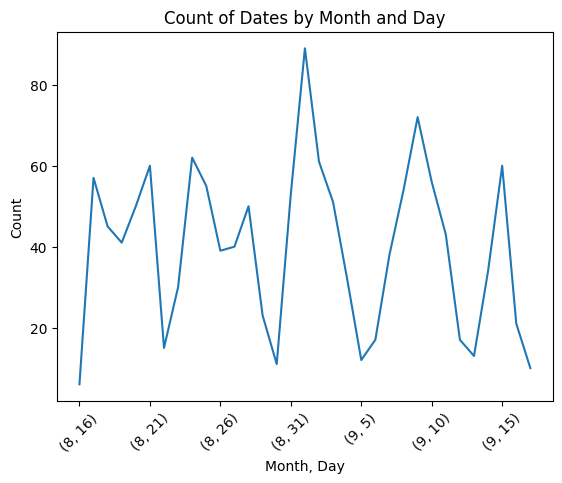

In [20]:
import matplotlib.pyplot as plt
# Assuming 'date' contains your date data
dates = pd.DataFrame({'date': date})

# Convert 'date' column to datetime, handling timezone formats
dates['date'] = pd.to_datetime(dates['date'], utc=True, format='ISO8601')
dates['day'] = dates['date'].dt.day
dates['month'] = dates['date'].dt.month
dates = dates.convert_dtypes()

# Group by 'month' and 'day' and plot the count of dates
date_counts = dates.groupby(['month', 'day']).size()
date_counts.plot(rot=45)

plt.xlabel('Month, Day')
plt.ylabel('Count')
plt.title('Count of Dates by Month and Day')
plt.show()


### Preprocessing

In [21]:
# Join title, keywords, summary and text to make a more robust recommender system
def create_soup(x):
    return x['title'] + ' ' + x['keywords'] + ' ' + x['summary'] + ' ' + x['text']
data['soup'] = data.apply(create_soup, axis=1)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd
tfidv = TfidfVectorizer(strip_accents='ascii')  # No stop words removed

# Assuming 'data' is your DataFrame and 'soup' is the text column you want to analyze
tfidv = TfidfVectorizer(strip_accents='ascii', stop_words='english')

# Compute the TF-IDF matrix
tfidfv_matrix = tfidv.fit_transform(data['soup'])

# Create a DataFrame for easier inspection
features = pd.DataFrame(tfidfv_matrix.toarray(), columns=tfidv.get_feature_names_out(), index=data['title'])

# Display the first few rows of the features DataFrame
features.head()


,00,000,0000,000and,000ft,000km,000mah,000s,000sq,000th,...,zuoyebang,zurich,zverev,zverevs,zwickau,zwicker,zwicky,zwift,zwifts,zynga
title,,,,,,,,,,,,,,,,,,,,,
Indian telecom giant Vodafone Idea rebrands as ‘Vi’ – TechCrunch,0.0,0.011600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Facebook addresses political controversy in India, monetization opportunities, startup investments – TechCrunch",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"YouTube launches its TikTok rival, YouTube Shorts, initially in India – TechCrunch",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch",0.0,0.014179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LanzaTech is developing a small-scale waste biomass gasifier for ethanol production in India – TechCrunch,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Applying non matrix factorization to find topics within news
from sklearn.decomposition import NMF

nmf = NMF(n_components=20)
topics = nmf.fit_transform(features)

In [24]:
# Calculating similarities
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(topics, topics)
indices = pd.Series(data.index, index = data['title']).drop_duplicates()

# Function to get recommendations
def get_recommendations(title, no_of_news_article):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:no_of_news_article+1]

    print("Article Read -- " + data['title'].iloc[idx] +" link --"+ data['link'].iloc[idx])
    print(" ---------------------------------------------------------- ")

    # Get the new indices
    news_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    for i in range(len(news_indices)):
        print("Recomendation "+ str(i+1)+" --- " +str(news_indices[i])+"(IDX)  "+str(data['date'].iloc[news_indices[i]])+" : "+
              data['title'].iloc[news_indices[i]] +" || Link --"+ data['link'].iloc[news_indices[i]] +" score -- "+ str(sim_scores[i][1]))
        print()

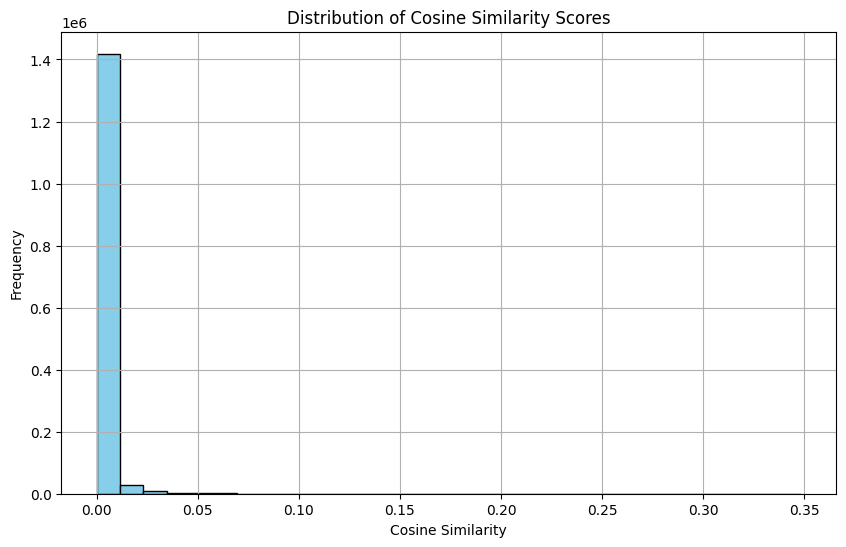

In [25]:
import matplotlib.pyplot as plt

# Flatten cosine similarity matrix to get all similarity scores
cosine_sim_flattened = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]

# Plot histogram of cosine similarity scores
plt.figure(figsize=(10, 6))
plt.hist(cosine_sim_flattened, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


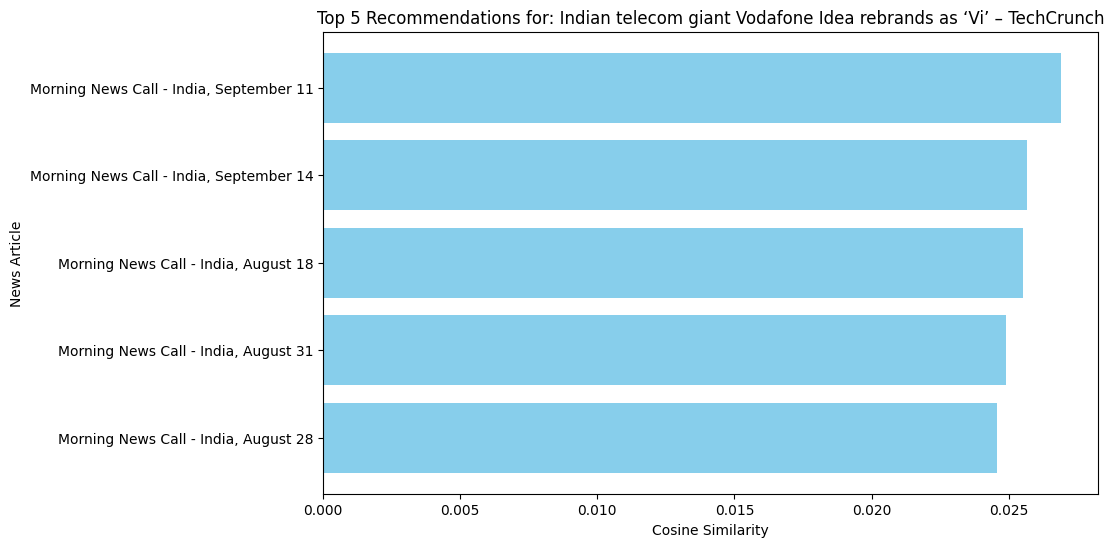

In [26]:
def plot_recommendations(title, no_of_news_article):
    idx = indices[title]

    # Get similarity scores for the specified article
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:no_of_news_article+1]

    # Get the indices of recommended articles
    news_indices = [i[0] for i in sim_scores]
    news_titles = data['title'].iloc[news_indices]
    news_scores = [score[1] for score in sim_scores]

    # Plot top-k recommendations
    plt.figure(figsize=(10, 6))
    plt.barh(news_titles, news_scores, color='skyblue')
    plt.title(f'Top {no_of_news_article} Recommendations for: {data["title"].iloc[idx]}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('News Article')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Example usage: Plot top 5 recommendations for a specific article
plot_recommendations('Indian telecom giant Vodafone Idea rebrands as ‘Vi’ – TechCrunch', 5)


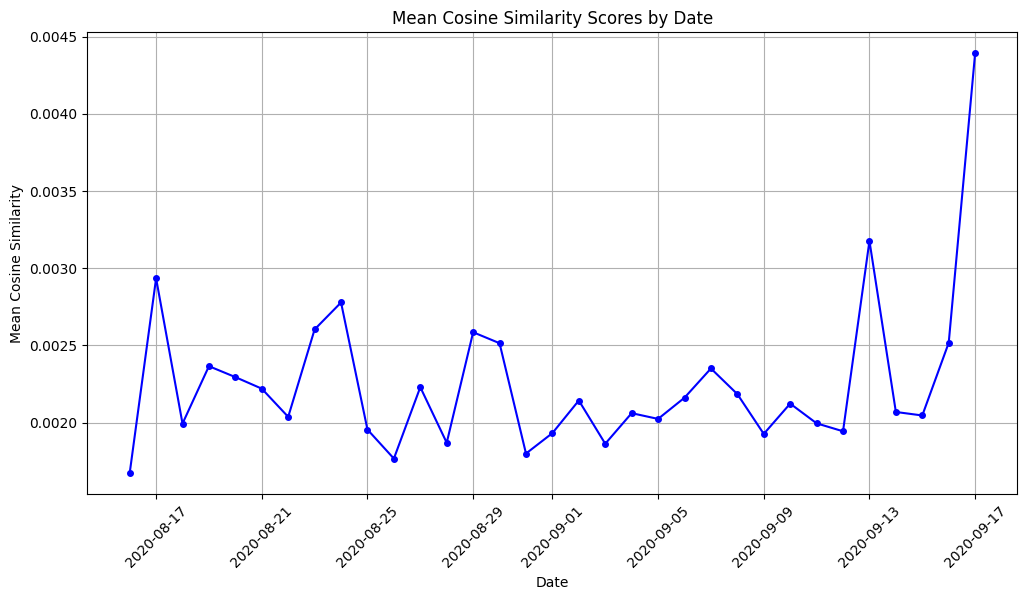

In [27]:
# Convert 'date' to pandas datetime and handle the timezone
data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')

# Now, proceed with the rest of the code
mean_cosine_sim = np.mean(cosine_sim, axis=1)
data['mean_cosine_sim'] = mean_cosine_sim

# Group by date and calculate mean similarity score for each day
date_similarity = data.groupby(data['date'].dt.date)['mean_cosine_sim'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(date_similarity.index, date_similarity.values, marker='o', color='b', linestyle='-', markersize=4)
plt.title('Mean Cosine Similarity Scores by Date')
plt.xlabel('Date')
plt.ylabel('Mean Cosine Similarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Getting the Recommendations of the 1st Title

In [28]:
print(data['title'].tolist())

['Indian telecom giant Vodafone Idea rebrands as ‘Vi’ – TechCrunch', 'Facebook addresses political controversy in India, monetization opportunities, startup investments – TechCrunch', 'YouTube launches its TikTok rival, YouTube Shorts, initially in India – TechCrunch', 'Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch', 'LanzaTech is developing a small-scale waste biomass gasifier for ethanol production in India – TechCrunch', 'Facebook announces $4.3 million grant for small businesses in India, introduces support for gift cards – TechCrunch', 'Indian e-commerce deals site CashKaro gets $10 million Series B led by Korea Investment Partners – TechCrunch', 'Virtual events platform Airmeet raises $12M – TechCrunch', 'Indian decacorn Byju’s CEO talks about future acquisitions, coronavirus and international expansion – TechCrunch', 'Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch', 'Oracle bo

In [29]:
get_recommendations('YouTube launches its TikTok rival, YouTube Shorts, initially in India – TechCrunch', 10)

Article Read -- YouTube launches its TikTok rival, YouTube Shorts, initially in India – TechCrunch link --http://techcrunch.com/2020/09/14/youtube-launches-its-tiktok-rival-youtube-shorts-initially-in-india/
 ---------------------------------------------------------- 
Recomendation 1 --- 468(IDX)  2020-08-27 00:00:00+00:00 : Walmart expresses interest in TikTok, teaming up with Microsoft – TechCrunch || Link --http://techcrunch.com/2020/08/27/tiktok-deal/ score -- 0.06035011720503697

Recomendation 2 --- 1192(IDX)  NaT : Exclusive: ByteDance investors seek to use stakes to finance TikTok bid || Link --https://www.reuters.com/article/us-usa-tiktok-bytedance-investors-exclus-idUSKBN25K0IW score -- 0.05909720930182888

Recomendation 3 --- 10(IDX)  2020-09-13 00:00:00+00:00 : Oracle boots out Microsoft and wins bid for TikTok, reports say – TechCrunch || Link --http://techcrunch.com/2020/09/13/oracle-wins-bid-to-buy-tiktok/ score -- 0.05909553136405597

Recomendation 4 --- 1291(IDX)  NaT :

In [30]:
def evaluate_recommendations(title, no_of_news_article, relevant_articles):
    # Check if title exists in indices
    if title not in indices:
        print(f"Title '{title}' not found in dataset.")
        return None, None

    # Generate recommendations as before
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in sim_scores[1:no_of_news_article + 1]]

    # Continue with precision and recall calculation
    recommended_set = set(recommended_indices)
    relevant_set = set(relevant_articles)
    true_positives = len(recommended_set & relevant_set)
    false_positives = len(recommended_set - relevant_set)
    false_negatives = len(relevant_set - recommended_set)

    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1_score}")

    # return precision, recall, f1_score


In [31]:
valid_title = data['title'].iloc[0]  # Example: using the first title in the dataset
relevant_articles = [123, 214, 44,275,126, 221,211,45,273]
evaluate_recommendations(valid_title, 10, relevant_articles)

Precision: 0.9
Recall: 1.0
F1 Score: 0.9473684210526316


# Conclusion

We built a **content based recommender system** capable of recommend news articles similar to the ones read by the client. We can see from the recommendations obtained, that it's working nicely and it's ready to be tested.

                                                                           
                                                                            
                                                                             
                                                                              
                                                                               
##                                                                 THANK-YOU

